In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Decision trees

## 1. Introduction

 A decision Tree is a supervised machine learning algorithm that partitions data into subsets based on feature values, making a sequence of decisions to ultimately predict a target variable's outcome.
 <br>
 Think of it as a flowchart for decision-making, where each internal node represents a decision based on a feature, leading to subsequent nodes until a leaf node is reached, providing the final prediction.

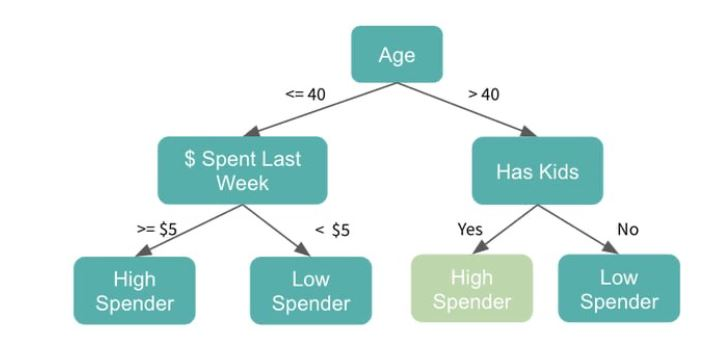

In [9]:
from PIL import Image
Image.open('/content/drive/MyDrive/Class 25-26/3.Images/6. Decision trees/1_arbre.JPG')



Decision trees can be classified based on the type of target or response variable.
* **Classification Trees:** the default type of decision trees, used when the response variable is categorical—i.e. predicting whether a patient should take pill A or B
* **Regression Trees:** used when the target variable is continuous or numerical in nature—i.e. predicting house prices based on year of construction, number of rooms, etc.

### 1.1 Common terminology

* **Root node:** this represents the entire population or the sample, which gets divided into two or more homogenous subsets.
* **Splitting:** subdividing a node into two or more sub-nodes.
* **Decision node:** this is when a sub-node is divided into further sub-nodes.
* **Leaf/Terminal node:** this is the final/last node that we consider for our model output. It cannot be split further.
* **Pruning:** removing unnecessary sub-nodes of a decision node to combat overfitting.
* **Branch/Sub-tree:** the sub-section of the entire tree.
* **Parent and Child node:** a node that’s subdivided into a sub-node is a parent, while the sub-node is the child node.

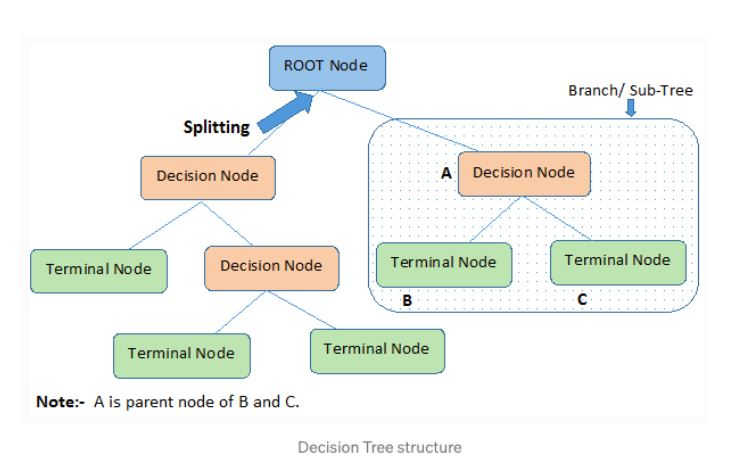

In [ ]:
Image.open('/content/drive/MyDrive/Class 25-26/3.Images/6. Decision trees/2_terminology.JPG')



### 1.2 Foundational decision tree algorithms

#### ID3 (Iterative Dichotomiser 3)

ID3 is one of the earliest decision tree algorithms, developed by Ross Quinlan. It focuses on building decision trees for classification tasks. ID3 employs the concept of information gain to select the best features for splitting the data at each node.

##### C4.5

C4.5 is an extension of ID3, also developed by Ross Quinlan. It addresses some of ID3's limitations and introduces new techniques for tree building.

#### CART (Classification and Regression Trees)

CART is a decision tree algorithm developed by Breiman et al. It can be used for both classification and regression tasks. Unlike ID3 and C4.5, which focus on classification, CART supports a broader range of tasks.

### 1.3 Advantages and disadvantages


#### Advantages of Decision Trees

* Interpretability: Decision Trees offer transparent and intuitive decision logic, making it easy to understand how predictions are made.
* Handling Nonlinearity: They can capture complex relationships between features and target variables without assuming linear patterns.
* Both Classification and Regression: Decision Trees can handle both categorical and continuous target variables, making them versatile.
* Feature Importance: Decision Trees can rank features by their importance in decision-making, aiding in feature selection.

#### Disadvantages of Decision Trees

* Overfitting: Decision Trees can become overly complex and fit noise in the training data, leading to poor generalization on new data.
* Instability: Small changes in data can lead to significantly different trees, making them sensitive to variations.
* Bias towards Dominant Classes: In classification tasks, Decision Trees can favor classes with more samples, potentially leading to imbalanced predictions.

## 2. Splitting criteria

Decision trees work by dividing the data into subsets based on feature values, allowing for effective classification or regression. **To determine how to split the data, we need a measure that quantifies the quality of a split.**
* **Splitting Criteria:** Splitting criteria evaluate the impurity or uncertainty within a set of data points. The goal is to find the best split that minimizes this uncertainty, resulting in more homogeneous subsets.

### 2.1 Types of splitting criteria

#### 2.1.1 Gini impurity

Gini impurity measures the probability of incorrectly classifying a randomly chosen element in a dataset. Gini impurity is a measure used by the CART algorithm.

**Characteristics:**

* Scale: For binary classification, Gini impurity values range between 0 and 0.5, where 0 represents a perfectly pure dataset (all instances belong to the same class), and 0.5 represents maximum impurity (an equal distribution of instances across all classes).
* Sensitivity to Imbalance: Gini impurity is sensitive to class imbalance. It tends to favor splits that create more balanced subsets.
* Binary Decision: In each binary split, the Gini impurity is calculated for both resulting subsets, and the weighted sum of the impurities is used to evaluate the quality of the split.
* Decision Tree Usage: Gini impurity is commonly used in decision tree algorithms such as CART (Classification and Regression Trees)

**Implications:**

* A lower Gini impurity indicates a purer and more homogeneous subset.
* Decision trees using Gini impurity tend to create balanced splits that may lead to shorter and simpler trees.

**Formula:**

Given a dataset of samples $\mathcal{D}$, where each sample belongs to one class within $\{1,\ldots,K\}$, we compute the Gini impurity of the dataset as:

$$Gini(\mathcal{D}) = 1 - \sum_{k=1}^{K} p_k^2$$

where $p_k$ is the probability (proportion of samples) of class $k$.

**How it works**

The minimum value of the Gini Index is 0. This happens when the node is pure, this means that all the contained elements in the node are of one unique class. Therefore, this node will not be split again. Thus, the optimum split is chosen by the features with less Gini Index. Moreover, it gets the maximum value when the probability of the two classes are the same.


#### 2.1.2 Entropy

Entropy is a measure of the disorder or randomness in a dataset. In decision trees, entropy quantifies the uncertainty about the class labels of the target variable.

**Characteristics:**

* Scale: Entropy values range between 0 and 1, where 0 represents perfect order (all instances belong to a single class), and 1 represents maximum disorder (an equal distribution of instances across all classes).
* Sensitivity to Imbalance: Like Gini impurity, entropy is also sensitive to class imbalance and may lead to more balanced splits.
* Information Theory: Entropy is rooted in information theory and reflects the average number of bits needed to represent the class labels of instances in the dataset.
* Decision Tree Usage: Entropy is commonly used in decision tree algorithms such as ID3 (Iterative Dichotomiser 3) and C4.5.

**Implications:**

A lower entropy indicates a more certain and pure subset.
Decision trees using entropy as a splitting criterion aim to create subsets that minimize uncertainty and disorder.

**Formula:**
$$Entropy = \sum_{j}^{} p_j · log_2 (p_j)$$

**How it works**

 Similar to the Gini Index, the optimum split is chosen by the feature with the least entropy. It gets its maximum value when the probability of the two classes is the same, and a node is pure when the entropy has its minimum value, which is 0.

## 3. Decision trees for classification

**Main intuition driving the building of a decision tree classifier:** at each step, split the data so that, after the split, each node mostly contains one class (it is **pure**).


## 3.1 Building a decision tree for categorical variables

* Suppose your goal is to construct a classifier that predicts whether an individual is likely to default on their credit card. You possess a dataset labelled with attributes, including age ranges, income levels, credit ratings, and whether each person is enrolled as a student. <br>
* To identify the optimal attribute for the initial split of the decision tree, known as the root node, you could assess the effectiveness of each attribute in segregating the data into the correct categories: either indicating default ("yes") or non-default ("no"). <br>
* This assessment would gauge the level of impurity resulting from the split, and the attribute with the least impurity would be chosen as the most suitable criterion for dividing the present node. This process would then proceed iteratively for subsequent nodes, using the remaining attributes.

In [ ]:
# Import libraries
import numpy as np
import pandas as pd

# Defining a simple dataset
df = pd.DataFrame ({
    'age' : ['youth', 'youth', 'middle_age', 'senior', 'senior', 'senior','middle_age', 'youth', 'youth', 'senior', 'youth', 'middle_age','middle_age', 'senior'],
    'income' : ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium','low', 'medium', 'medium', 'medium', 'high', 'medium'],
    'student' : ['no','no','no','no','yes','yes','yes','no','yes','yes','yes','no','yes','no'],
    'credit_rate' : ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair','excellent', 'excellent', 'fair', 'excellent'],
    'default' : ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes','yes', 'yes', 'yes', 'no']})
display(df)

,age,income,student,credit_rate,default
0,youth,high,no,fair,no
1,youth,high,no,excellent,no
2,middle_age,high,no,fair,yes
3,senior,medium,no,fair,yes
4,senior,low,yes,fair,yes
5,senior,low,yes,excellent,no
6,middle_age,low,yes,excellent,yes
7,youth,medium,no,fair,no
8,youth,low,yes,fair,yes
9,senior,medium,yes,fair,yes


In [ ]:
# Initial check
class_name = 'default'
class_value_counts = df[class_name].value_counts()
print(f'Number of samples in each class is:\n{class_value_counts}')

Number of samples in each class is:
default
yes    9
no     5
Name: count, dtype: int64


### 3.1.1 Selecting the best feature to split at

Let's first calculate the Gini impurity for feature **age**.

First, let's check the number of classes it contains and the number of each:

In [ ]:
# Age attribute
attribute = 'age'
target = 'default'

result = df[attribute].value_counts().reset_index()
result.columns = [attribute, 'num']
display(result)

,age,num
0,youth,5
1,senior,5
2,middle_age,4


Now,for each age_class, let's calculate how many people for each age category are classified as 'yes' and 'no' according to their default.

In [ ]:
# Calculate the number of people with default = 'yes' for each age
df_yes = df[df[target] == 'yes'].groupby(attribute)[target].count().reset_index()
df_yes.columns = [attribute, 'n_yes']

# Add to the previous table
result = result.merge(df_yes, on='age', how='left')
display(result)

,age,num,n_yes
0,youth,5,2
1,senior,5,3
2,middle_age,4,4


Now calculate the proportion of credit default (yes and no) for each age category:

In [ ]:
result['p_yes'] = result['n_yes']/result['num']
result['p_no'] = 1 - result['p_yes']
display(result)

,age,num,n_yes,p_yes,p_no
0,youth,5,2,0.4,0.6
1,senior,5,3,0.6,0.4
2,middle_age,4,4,1.0,0.0


Calculate Gini impurity for each category of feature *age*:

In [ ]:
result['gini_impurity'] = 1 - result['p_yes']*result['p_yes'] - result['p_no']*result['p_no']
display(result)

,age,num,n_yes,p_yes,p_no,gini_impurity
0,youth,5,2,0.4,0.6,0.48
1,senior,5,3,0.6,0.4,0.48
2,middle_age,4,4,1.0,0.0,0.00


Finally, calculate the Gini impurity for the age feature:

In [ ]:
class_gini_impurity = (result['num'] * result['gini_impurity']).sum() / result['num'].sum()
print(f'Gini for age is {class_gini_impurity:.4f}')

Gini for age is 0.3429


We are ready to code how to compute the **Gini impurity of a split** (or Gini split for shorter) on a given feature, which we obtain as the weighted Gini impurity after a split on the feature. This is used to decide which feature best splits the data (i.e., which has the lowest Gini impurity *after the split*). Formally, we compute the Gini split for feature $a$ as:

$$\text{Gini}_{\text{split}}(\mathcal{D},x_j) = \sum_{v \in \text{Values}(x_j)} \frac{n_v}{n} \cdot \text{Gini}(\mathcal{D}_v)$$

where:

* $x_j$ is the feature being split on

* $Values(x_j)$ is the set of all unique values that attribute $a$ can take

* $n_v$ is the number of samples of the subset $\mathcal{D}_v$ for which $x_j =v$.

* $n$ is the total number of samples in $\mathcal{D}$ in the parent node

* $Gini(\mathcal{D}_v)$ is the Gini impurity of the subset $\mathcal{D}_v$ for which $x_j =v$.



In [ ]:
# Computes the Gini impurity for a set of class counts
def gini_impurity (value_counts):
    n = value_counts.sum()
    p_sum = 0
    for key in value_counts.keys():
        p_sum = p_sum  +  (value_counts[key] / n ) * (value_counts[key] / n )
    gini = 1 - p_sum
    return gini

# Computes the Gini impurity of a split on a given attribute.
# This is used to decide which attribute best splits the data (i.e., which has the lowest Gini impurity after the split).
def gini_split_a(df1,class_name,attribute_name):
    attribute_values = df1[attribute_name].value_counts()  # frequency of each attribute value
    gini_A = 0
    for key in attribute_values.keys():
        df_k = df1[class_name][df1[attribute_name] == key].value_counts() # class counts for subset of class_name
        n_k = attribute_values[key] # number of samples in this subset
        n = df1.shape[0] # total number of samples
        gini_A = gini_A + (( n_k / n) * gini_impurity(df_k))  # weighted Gini
    return gini_A

class_name ='default'
print('Gini impurities per feature:\n')
for col in df.columns:
    if col != class_name:
        print(col,"->", gini_split_a(df,class_name,col))

Gini impurities per feature:

age -> 0.34285714285714286
income -> 0.44047619047619047
student -> 0.3673469387755103
credit_rate -> 0.42857142857142855


**Age stands out as the feature with the lowest Gini impurity.**



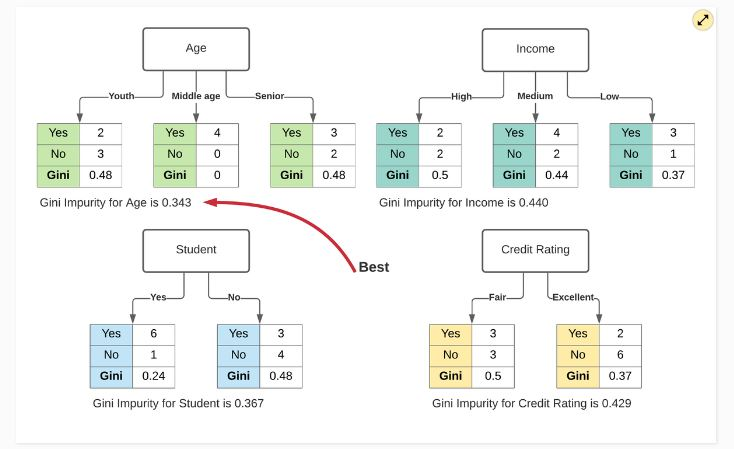

In [10]:
Image.open('/content/drive/MyDrive/Class 25-26/3.Images/6. Decision trees/3_gini.JPG')

### 3.1.2 Computing the decision threshold for the splitting feature

However, as we move forward with constructing the tree, the question arises: with 'age' identified as the optimal attribute, how do we determine the decision threshold? To address this, we need to evaluate the Gini impurity across all classes within the 'age' feature, ultimately selecting the class associated with the lowest Gini impurity.

In [ ]:
# Calculate Gini impurity for each age category

# Define the age categories you want to compute Gini for
age_categories = ['youth', 'middle_age', 'senior']

# Initialise a dictionary to store Gini impurity values for each age group
gini_values = {}

# Loop through each age category
for age_category in age_categories:
    # Select the subset of rows where age matches the current category
    subset = df[df['age'] == age_category]
    # Count the number of rows in this subset
    num_samples = len(subset)
    # Count how many samples in this subset belong to each class ('yes' or 'no')
    class_counts = subset['default'].value_counts()
    # Calculate the proportion of 'yes' and 'no' labels in the subset
    p_yes = class_counts.get('yes', 0) / num_samples
    p_no = class_counts.get('no', 0) / num_samples
    # Compute Gini impurity for this subset
    gini = 1 - (p_yes ** 2 + p_no ** 2)
    # Store the Gini impurity value in the dictionary
    gini_values[age_category] = gini

# Find the age category with the lowest Gini impurity
print("Gini values per class:", gini_values)
best_age_category = min(gini_values, key=gini_values.get)
best_gini = gini_values[best_age_category]

print(f"Best Age Category: {best_age_category}")
print(f"Lowest Gini Impurity: {best_gini:.3f}")


Gini values per class: {'youth': 0.48, 'middle_age': 0.0, 'senior': 0.48}
Best Age Category: middle_age
Lowest Gini Impurity: 0.000


Once you've determined the best age category ('middle age') based on the lowest Gini impurity, you would create a decision node that tests whether the 'age' feature is equal to best_age_category. Here's how you could represent this decision node:

In [ ]:
# From the initial node1
if age == best_age_category:
    go to Node 2
else:
    go to Node 3

You would then continue building the decision tree by further splitting the data at Nodes 2 and 3, based on other features or conditions, until you reach terminal nodes (leaves) where predictions are made.

### 3.1.3 Learning the decision tree with sklearn

In scikit-learn, `DecisionTreeClassifier` does **not** natively handle categorical (string) features.  
It expects **numeric inputs only** — so you cannot directly feed it a DataFrame with string-valued columns like `"youth"`, `"medium"`, `"yes"`, `"fair"`, etc.

That is why we use a `OneHotEncoder` (or sometimes an `OrdinalEncoder`) to convert categorical variables into numerical form before training the tree.

This is necessary because the algorithm implemented in scikit-learn’s `DecisionTreeClassifier` is based on the CART (Classification and Regression Trees) method.  
- **CART only supports binary numeric splits** for some numeric threshold $t$.
- For categorical variables (like “youth”, “senior”, “middle\_age”), there’s no natural numerical ordering, so the model cannot compute such a threshold directly.

Hence, we must encode categories numerically before passing them to the tree.  
With one-hot encoding, each category is represented by a separate binary feature (e.g., `age_youth`, `age_senior`, `age_middle_age`), allowing the decision tree to process categorical information using numeric splits.

Train accuracy: 1.0
Test  accuracy: 0.6

One-hot encoded training data (first rows):


,age_middle_age,age_senior,age_youth,income_high,income_low,income_medium,student_no,student_yes,credit_rate_excellent,credit_rate_fair
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


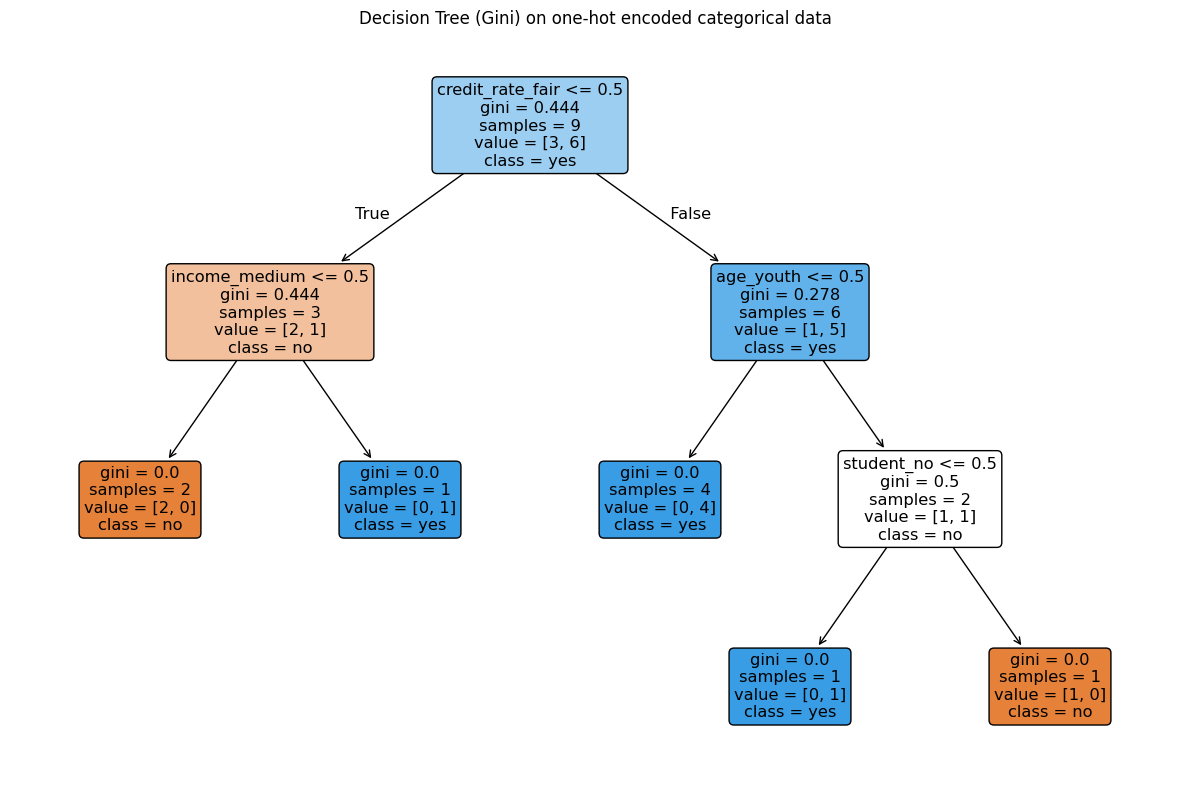

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame ({
    'age' : ['youth', 'youth', 'middle_age', 'senior', 'senior', 'senior','middle_age', 'youth', 'youth', 'senior', 'youth', 'middle_age','middle_age', 'senior'],
    'income' : ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium','low', 'medium', 'medium', 'medium', 'high', 'medium'],
    'student' : ['no','no','no','no','yes','yes','yes','no','yes','yes','yes','no','yes','no'],
    'credit_rate' : ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair','excellent', 'excellent', 'fair', 'excellent'],
    'default' : ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes','yes', 'yes', 'yes', 'no']
})

X = df.drop(columns=['default'])
y = df['default']
cat_cols = X.columns.tolist()

# Use the correct argument depending on the sklearn version
try:
    ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
except TypeError:
    ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

tree = DecisionTreeClassifier(criterion='gini', random_state=0)
pipe = Pipeline([
    ('prep', ColumnTransformer([('cat', ohe, cat_cols)], remainder='drop')),
    ('clf', tree)
])

# NO NEED TO DO FEATURE SCALING!
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)
pipe.fit(X_train, y_train)

print("Train accuracy:", pipe.score(X_train, y_train))
print("Test  accuracy:", pipe.score(X_test, y_test))

# Show the one-hot encoded training data
ohe_fitted = pipe.named_steps['prep'].named_transformers_['cat']
feature_names = ohe_fitted.get_feature_names_out(cat_cols)
encoded = ohe_fitted.transform(X_train)

encoded_df = pd.DataFrame(encoded, columns=feature_names)
print("\nOne-hot encoded training data (first rows):")
display(encoded_df.head())

# Visualise the tree
plt.figure(figsize=(12, 8))
plot_tree(pipe.named_steps['clf'],
          feature_names=feature_names,
          class_names=pipe.named_steps['clf'].classes_,
          filled=True, rounded=True)
plt.title("Decision Tree (Gini) on one-hot encoded categorical data")
plt.tight_layout()
plt.show()


### 3.2 Learning a decision tree for continuous features

Next, we  show how to use the sklearn library to learn a decision tree to classify iris flowers into one of three species based on **two** features (all numeric measurements of the flowers).

In [ ]:
from sklearn import datasets
import numpy as np


iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

feature_names = np.array(iris.feature_names)[[2, 3]]
print('Feature names:', feature_names)
class_names = iris.target_names
print(class_names)
print('Class labels:', np.unique(y))

Feature names: ['petal length (cm)' 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
Class labels: [0 1 2]


In [ ]:
from sklearn.model_selection import train_test_split

# the stratify=y argument ensures that the class distribution in y is preserved in both the training and test sets
# ensures that both y_train and y_test have roughly the same class proportions as y.
# If your dataset is imbalanced (e.g., 80% "no" and 20% "yes"), a random split without stratification might result in:
#    a training set with mostly "no"
#    a test set with too few or too many "yes" instances
# This can hurt the model’s ability to generalise and be evaluated properly.

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [ ]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


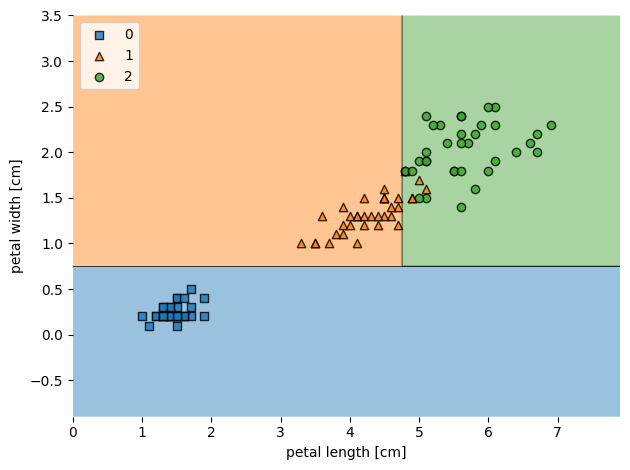

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from mlxtend.plotting import plot_decision_regions


tree = DecisionTreeClassifier(criterion='gini',
                              max_depth=2,
                              random_state=1)
tree.fit(X_train, y_train)


plot_decision_regions(X_train, y_train, tree)

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

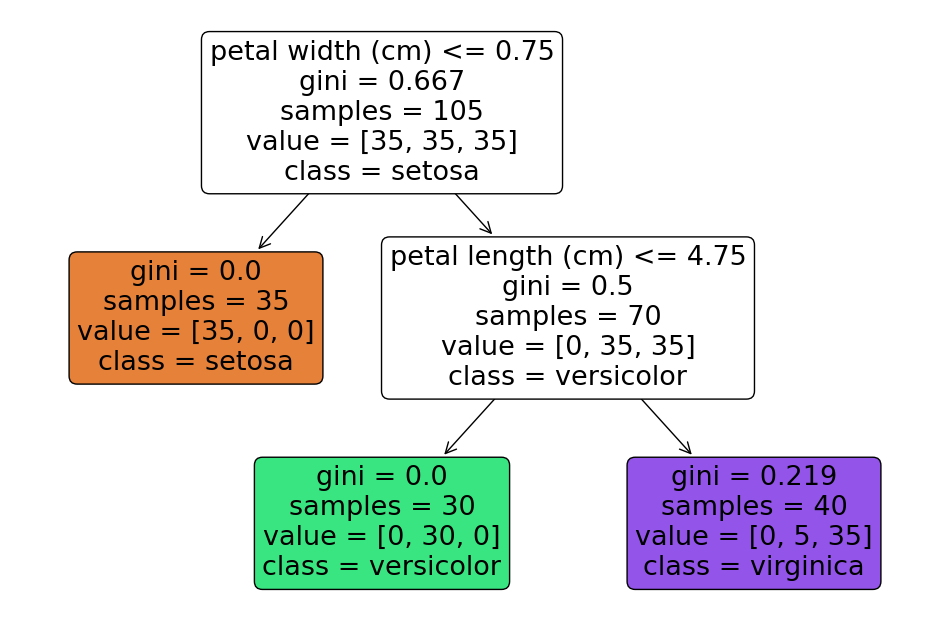

In [ ]:
plt.figure(figsize=(12, 8))
plot_tree(tree,
          feature_names=feature_names,
          class_names=iris.target_names,
          filled=True,
          rounded=True)
plt.show()

Next, we  show how to use the sklearn library to learn a decision tree to classify iris flowers into one of three species based on **four** features (all numeric measurements of the flowers).


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


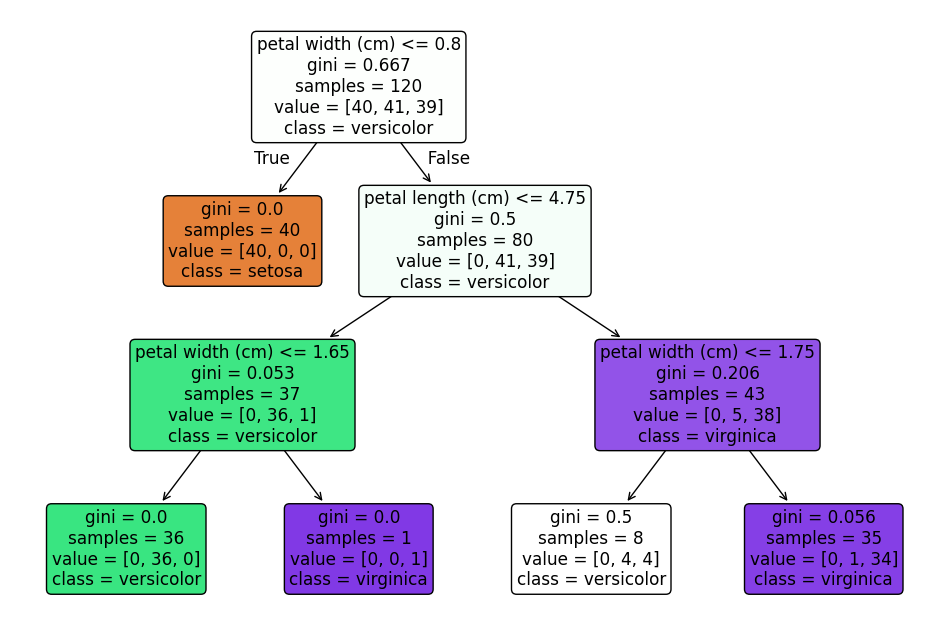

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Sp 1: Load the dataset
iris = load_iris()
X = iris.data
y = iris.target

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=1, max_depth = 3)

# Step 4: Fit the classifier to the training data
clf.fit(X_train, y_train)

# Step 5: Make predictions on the testing data
y_pred = clf.predict(X_test)

# Step 6: Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)

# Step 7: Plot the decision tree
# Edge labels are implicit: the split condition is shown inside the parent node, e.g., petal width (cm) ≤ 0.8
# The left edge means the condition is True.
# The right edge means the condition is False.

plt.figure(figsize=(12, 8))
plot_tree(clf,
          feature_names=iris.feature_names,
          class_names=iris.target_names,
          filled=True,
          rounded=True)
plt.show()

### How a decision tree classifier finds the best split for continuous features

At each node, a decision tree classifier must decide where to split the data — that is, it needs to find both:
1. **Which feature** to split on, and  
2. **At what threshold** to split it. When a **decision tree** encounters a **continuous feature** (like *petal length* in the Iris dataset), it needs to decide **where to split** that continuous range into two parts — for example, *“petal length ≤ 4.75 cm”* vs *“petal length > 4.75 cm”*.

The algorithm does this **automatically** by testing many possible **thresholds** per feature and choosing the one that best separates the flower species.

The goal is to make the resulting subsets (child nodes) as **pure** as possible — meaning each node should contain mostly samples from a single class.

#### Step 1: Evaluate every feature

For each feature (e.g., in the Iris dataset: sepal length, sepal width, petal length, petal width):

1. **Sort** the training samples by that feature’s value.  
   Example (petal length): `[1.0, 1.3, 1.5, 3.0, 4.5, 5.1]`.

2. **Generate candidate thresholds** between consecutive unique values:
   $$
   t_i = \frac{x_{(i)} + x_{(i+1)}}{2}
   $$
   The candidate thresholds here are: 1.15, 1.4, 2.25, 3.75, 4.8.

3. For each threshold $t$:
   - Split the samples into two groups:
     - Left node: all samples with $ x \le t $
     - Right node: all samples with $ x > t $
   - Compute how **pure** each group is, using a measure such as **Gini impurity** or **entropy**.

#### Step 2: Compute the impurity reduction (information gain)

Each threshold’s **quality** is measured by how much it **reduces impurity** compared to the parent node.

$$
\text{Gain}(t) = I_{\text{parent}} - \frac{n_L}{n}I_{\text{left}} - \frac{n_R}{n}I_{\text{right}}
$$

where:
- $I$ is the impurity measure (e.g., **Gini impurity**),
- $n_L, n_R$ are the numbers of samples in the left and right nodes,
- $n$ is the total number of samples at the parent node.

The higher the gain, the better the split.

**Notice that the equation above is an instance of the information gain equation seen in class.**

#### Step 3: Pick the best feature–threshold pair

1. For each feature, record the threshold that gives the **largest impurity reduction**.  
2. Compare those gains **across all features**.  
3. Select the **feature and threshold pair** that achieves the **highest overall gain**.  
   This determines how the node splits.

#### Example (Iris dataset)

After testing all features:
- Sepal length, best gain = 0.03  
- Sepal width, best gain = 0.02  
- Petal length, best gain = 0.42  
- Petal width, best gain = 0.38  

The best split is therefore on **petal length**, with a threshold such as, for instance, **2.25 cm** (one of the candidate thresholds in our example list).

#### Summary

A decision tree classifier:
- Tests every possible threshold on every feature.
- Computes how much each split reduces class impurity.
- Chooses the **feature–threshold pair** with the **highest impurity reduction**.

In short, the algorithm simultaneously decides *which feature* to split on and *where* to split it — by exhaustively searching for the most informative cut.

### Important note

Both **DecisionTreeClassifier** and **DecisionTreeRegressor** follow the **same algorithmic process** for finding the best split.

#### The key difference: impurity measure

| Task | Objective | Impurity measure |
|------|------------|------------------|
| **Classification** | Minimise class impurity | Gini impurity or Entropy |
| **Regression** | Minimise target variance | Mean Squared Error (variance of targets) |

---

#### Intuitive summary
- In **classification**, the algorithm prefers splits that make child nodes contain mostly **one class**.  
- In **regression**, it prefers splits that make child nodes contain samples with **similar target values** (low variance).  

## 4. Decision trees for regression

**Main intuition driving the building of a decision tree regressor:** at each step, split the data so that, after the split, each node’s target values are as close together as possible.

The goal of a decision tree regressor is to create splits that make each node as *homogeneous* as possible in the target (`y`).

The impurity measure for regression is now the **variance** of the target values in a node.

For the default criterion (`"squared_error"` in scikit-learn):

$$
I(\mathcal{D}) = \frac{1}{n} \sum_{i=1}^n (y_i - \bar{y})^2
$$

where $ \bar{y} $ is the mean of the targets in that node.

The algorithm picks the split that **minimises the weighted average variance** of the children — exactly analogous to minimising Gini impurity in classification. In other words:

| Task | Node impurity measure | Objective |
|------|-----------------------|------------|
| Classification | Gini or Entropy | Purity in class labels |
| Regression | Variance (Mean Squared Error) | Homogeneity in target values |


We will train a small Decision Tree Regressor on the Diabetes dataset and then see how it predicts the disease progression score for one example. Each leaf of the tree will contain the **average target value** of training samples that fall into that region.

The Diabetes dataset is a regression dataset containing medical measurements from diabetes patients.

- Samples: 442  
- Features: 10 continuous variables (e.g., age, BMI, blood pressure, and serum measurements).  
- Target (`y`): a quantitative measure of **disease progression one year after baseline**, scaled approximately between 25 and 346.  

The goal is to predict the disease progression score from the patient’s physiological features.

In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt
import pandas as pd

# Reproducibility
np.random.seed(42)

# Load data
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target
feature_names = diabetes.feature_names

# Print the first 10 rows of X
df_X = pd.DataFrame(X, columns=feature_names)
print("First 10 rows of X:")
print(df_X.head(10).to_string(index=False))

# Print the first 10 rows of y
print("\nTargets:",y[:10])

# Train a shallow tree for interpretability
tree = DecisionTreeRegressor(max_depth=3, random_state=42)
tree.fit(X, y)

# Pick a random sample
i = 0
sample = X[i].reshape(1, -1)
true_value = y[i]
pred_value = tree.predict(sample)[0]

print("\n")
print("True disease progression:", round(true_value, 2))
print("Predicted progression:   ", round(pred_value, 2))

# Print selected feature values for this sample
selected_features = ['s5', 'bmi', 's3']
print("\nSelected feature values:")
for feat in selected_features:
    print(f"{feat:>5}: {df_X.loc[i, feat]:.4f}")

First 10 rows of X:
      age       sex       bmi        bp        s1        s2        s3        s4        s5        s6
 0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401 -0.002592  0.019907 -0.017646
-0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412 -0.039493 -0.068332 -0.092204
 0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356 -0.002592  0.002861 -0.025930
-0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038  0.034309  0.022688 -0.009362
 0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142 -0.002592 -0.031988 -0.046641
-0.092695 -0.044642 -0.040696 -0.019442 -0.068991 -0.079288  0.041277 -0.076395 -0.041176 -0.096346
-0.045472  0.050680 -0.047163 -0.015999 -0.040096 -0.024800  0.000779 -0.039493 -0.062917 -0.038357
 0.063504  0.050680 -0.001895  0.066629  0.090620  0.108914  0.022869  0.017703 -0.035816  0.003064
 0.041708  0.050680  0.061696 -0.040099 -0.013953  0.006202 -0.028674 -0.002592 

The model divides the feature space by applying threshold rules on the features (e.g., BMI, age).

At each node:
- It checks a condition like `bmi ≤ 0.03` or `s5 > -0.01`.
- Depending on whether the condition is true or false, the sample moves left or right in the tree.
- Eventually, it reaches a leaf node, which stores the **mean disease progression** of all training samples that fell there.
- The model returns this mean as the **predicted value**.

In summary:
- A regression tree predicts by **averaging the target values** of similar samples (those that fall in the same leaf).
- The splitting conditions define what “similar” means, based on minimising variance within each leaf.


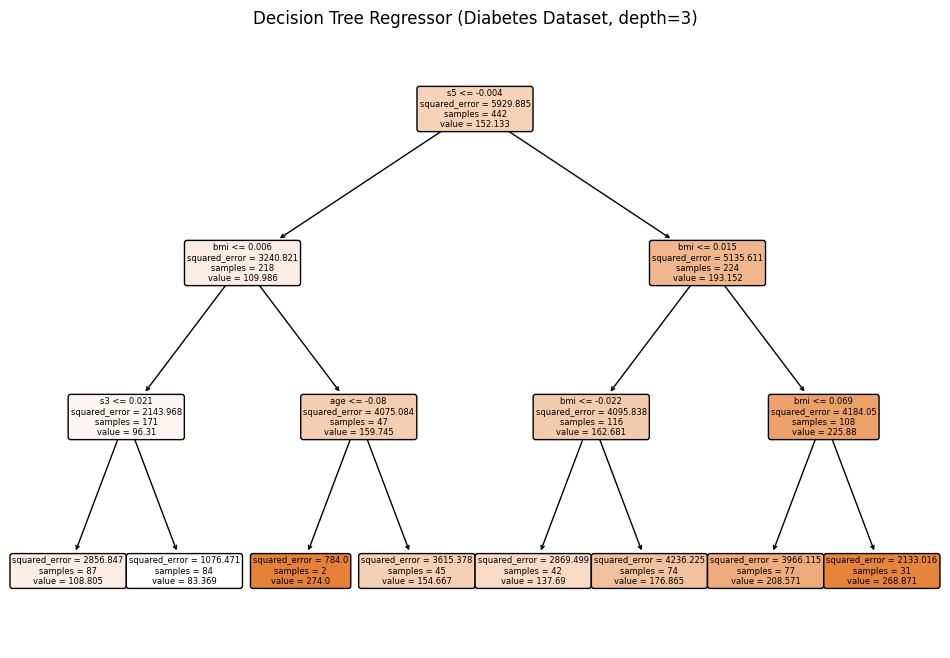

In [ ]:
# Visualise the trained tree
plt.figure(figsize=(12, 8))
plot_tree(tree, feature_names=feature_names, filled=True, rounded=True)
plt.title("Decision Tree Regressor (Diabetes Dataset, depth=3)")
plt.show()


### How a Decision Tree Regressor Finds the Threshold for a Continuous Variable

For a **continuous feature** (e.g., `bmi` in the Diabetes dataset), a decision tree must find a **threshold** that best splits the data into two groups — to make the target values within each group as **homogeneous** as possible.

#### Step-by-step process

1. **Sort** the training samples by the feature's value.

   Example:  
   Suppose the `bmi` values (and their targets) are:
   
bmi: [0.01, 0.02, 0.04, 0.05, 0.07]
target: [150, 160, 170, 200, 210]



2. **Generate candidate thresholds** between consecutive unique feature values:  
$
t_i = \frac{x_{(i)} + x_{(i+1)}}{2}
$
thresholds: 0.015, 0.03, 0.045, 0.06

3. **For each threshold $ t $:**
- Split the samples into:
  - Left group: $ x \le t $
  - Right group: $ x > t $
- Compute the **variance** (or mean squared error) of the target values in each group.

4. **Compute the impurity reduction** (variance reduction):
$$
\text{Gain}(t) = \text{Var}(y) - \left(\frac{n_L}{n}\text{Var}(y_L) + \frac{n_R}{n}\text{Var}(y_R)\right)
$$
where $ n_L $ and $ n_R $ are the sizes of the left and right subsets.

5. Select the threshold $ t^* $ that yields the **highest variance reduction** (i.e., the largest “gain”).

#### Intuition
- Each threshold is tested to see **how much it reduces the variability** of the target values within the child nodes.
- The split that produces the **most homogeneous target values** (lowest within-node variance) is chosen.

#### Example:
If splitting at `bmi ≤ 0.045` makes one group of patients have an average progression ≈ of 160 and another ≈ 205 (both with low internal variance),  this threshold will likely be selected because it best explains the variation in the target variable.


### Are Decision Trees Good for Regression?

Decision trees can work well for regression, but they have important strengths and weaknesses.


#### Advantages
- **Interpretability:** each prediction is easy to trace through human-readable rules (e.g., if `bmi ≤ 0.03` then predict 150).
- **Nonlinear relationships:** trees can model complex, nonlinear interactions between features.
- **No feature scaling needed:** trees are invariant to monotonic transformations (e.g., no need to standardise features).
- **Handle mixed data:** can work with both numerical and categorical features.

#### Limitations
- **Piecewise-constant predictions:** each leaf predicts the *average* target of its samples. It is a discontinuous, step-like function.
- **High variance/overfitting:** deep trees can memorise training data, giving poor generalisation unless pruned or regularised.
- **Limited extrapolation:** trees cannot predict values outside the range seen in training data.
- **Instability:** Small data changes can lead to very different splits.


In practice:
- A single decision tree regressor is often *too unstable* for strong predictive performance.
- But **ensembles of trees** (like Random Forests or Gradient Boosting, which we will study in Lecture 7) solve most of these issues and are among the **most powerful regression methods** in applied machine learning.

## Exercise

Now that you have seen how to create your own trees based on gini impurity, and also to use sklearn library to create the trees: <br>
* Train a tree (through the library) with the example data (default) creating 2 levels
* Continue the example we did splitting node1, and split node 2 and node3
* Compare the results of the tree done your own vs the one in the sklearn library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample DataFrame (replace with your actual data)
data = {
    'age': ['youth', 'youth', 'middle_age', 'senior', 'senior', 'senior', 'middle_age', 'youth', 'youth', 'senior', 'youth', 'middle_age', 'middle_age', 'senior'],
    'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'medium', 'high', 'medium'],
    'student': ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no'],
    'credit_rate': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'excellent'],
    'default': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
}

df = pd.DataFrame(data)

**Solution**

C:\Users\acorretger\AppData\Local\Temp\ipykernel_16876\2897293973.py:21: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if df[column].dtype == np.object:


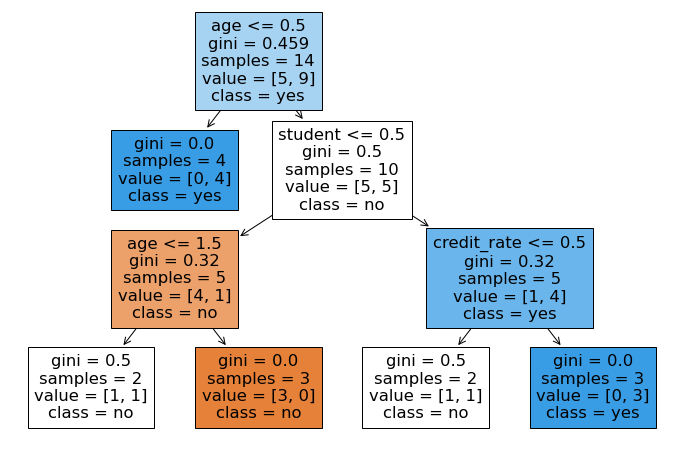

Node 1:
Number of Elements: 14
Probability of 'yes': 0.643
Split by feature': age
Feature decision': middle_age

Node 2:
Number of Elements: 10
Probability of 'yes': 0.500
Split by feature': student
Feature decision': no

Node 3:
Number of Elements: 4
Probability of 'yes': 1.000
Split by feature': No further split
Feature decision': No further split

Node 4:
Number of Elements: 5
Probability of 'yes': 0.800
Split by feature': credit_rate
Feature decision': fair

Node 5:
Number of Elements: 5
Probability of 'yes': 0.200
Split by feature': age
Feature decision': youth

